In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
df = df.iloc[0:500,:]

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             500 non-null    int64         
 1   date           500 non-null    datetime64[ns]
 2   price          500 non-null    float64       
 3   bedrooms       500 non-null    int64         
 4   bathrooms      500 non-null    float64       
 5   sqft_living    500 non-null    int64         
 6   sqft_lot       500 non-null    int64         
 7   floors         500 non-null    float64       
 8   waterfront     500 non-null    int64         
 9   view           500 non-null    int64         
 10  condition      500 non-null    int64         
 11  grade          500 non-null    int64         
 12  sqft_above     500 non-null    int64         
 13  sqft_basement  500 non-null    int64         
 14  yr_built       500 non-null    int64         
 15  yr_renovated   500 non-

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df = df.drop(['id','date'],axis = 1)

In [13]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    221900.0         3       1.00         1180      5650     1.0           0   
1    538000.0         3       2.25         2570      7242     2.0           0   
2    180000.0         2       1.00          770     10000     1.0           0   
3    604000.0         4       3.00         1960      5000     1.0           0   
4    510000.0         3       2.00         1680      8080     1.0           0   
..        ...       ...        ...          ...       ...     ...         ...   
495  490000.0         2       2.50         1230      1391     2.0           0   
496  725000.0         4       2.00         2110      4140     2.0           0   
497  299000.0         3       2.75         3080     19635     1.0           0   
498  625000.0         2       1.50         1490      5750     1.5           0   
499  437500.0         3       2.50         2120      4500     2.0           0   

     view  condition  grade  sqft_above  sqft_basement  yr_built  \
0       0          3      7        1180              0      1955   
1       0          3      7        2170            400      1951   
2       0          3      6         770              0      1933   
3       0          5      7        1050            910      1965   
4       0          3      8        1680              0      1987   
..    ...        ...    ...         ...            ...       ...   
495     0          3      8         870            360      2004   
496     0          3      9        1710            400      1925   
497     2          4      7        1610           1470      1958   
498     0          4      7        1190            300      1900   
499     0          3      7        2120              0      2000   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0               0    98178  47.5112 -122.257           1340        5650  
1            1991    98125  47.7210 -122.319           1690        7639  
2               0    98028  47.7379 -122.233           2720        8062  
3               0    98136  47.5208 -122.393           1360        5000  
4               0    98074  47.6168 -122.045           1800        7503  
..            ...      ...      ...      ...            ...         ...  
495             0    98112  47.6192 -122.301           1240        1350  
496          2003    98116  47.5836 -122.387           1440        4420  
497             0    98032  47.3841 -122.284           2424       12410  
498             0    98116  47.5872 -122.390           1590        4025  
499             0    98065  47.5322 -121.880           2530        4816  

[500 rows x 19 columns]

In [14]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.319960   0.507877     0.684413  0.161139  0.214015   
bedrooms       0.319960  1.000000   0.479773     0.572047  0.034260  0.209977   
bathrooms      0.507877  0.479773   1.000000     0.747006  0.140873  0.481808   
sqft_living    0.684413  0.572047   0.747006     1.000000  0.227708  0.338402   
sqft_lot       0.161139  0.034260   0.140873     0.227708  1.000000  0.003167   
floors         0.214015  0.209977   0.481808     0.338402  0.003167  1.000000   
waterfront     0.283721 -0.069765   0.075457     0.051186  0.029974 -0.024396   
view           0.466378  0.060320   0.197167     0.270734  0.002653 -0.045143   
condition      0.008030  0.050238  -0.057073    -0.015148 -0.023600 -0.194837   
grade          0.652581  0.419728   0.699895     0.787978  0.122381  0.433901   
sqft_above     0.581654  0.484211   0.686288     0.854416  0.263245  0.562936   
sqft_basement  0.348418  0.294459   0.294634     0.501488 -0.000179 -0.286197   
yr_built       0.060084  0.171543   0.531138     0.325336  0.109852  0.407477   
yr_renovated   0.209180  0.037543   0.082029     0.096028 -0.013394  0.052685   
zipcode       -0.090338 -0.190023  -0.269328    -0.251681 -0.136868 -0.101447   
lat            0.339943 -0.038452   0.050821     0.127140  0.036842  0.075170   
long           0.080382  0.117427   0.288041     0.257493  0.288601  0.212154   
sqft_living15  0.661278  0.410897   0.655186     0.813147  0.272188  0.317518   
sqft_lot15     0.157398  0.038056   0.171336     0.243355  0.797337  0.015593   

               waterfront      view  condition     grade  sqft_above  \
price            0.283721  0.466378   0.008030  0.652581    0.581654   
bedrooms        -0.069765  0.060320   0.050238  0.419728    0.484211   
bathrooms        0.075457  0.197167  -0.057073  0.699895    0.686288   
sqft_living      0.051186  0.270734  -0.015148  0.787978    0.854416   
sqft_lot         0.029974  0.002653  -0.023600  0.122381    0.263245   
floors          -0.024396 -0.045143  -0.194837  0.433901    0.562936   
waterfront       1.000000  0.462219   0.061494  0.048126   -0.005711   
view             0.462219  1.000000   0.078506  0.256291    0.131151   
condition        0.061494  0.078506   1.000000 -0.085912   -0.087394   
grade            0.048126  0.256291  -0.085912  1.000000    0.763468   
sqft_above      -0.005711  0.131151  -0.087394  0.763468    1.000000   
sqft_basement    0.107999  0.302560   0.116372  0.244960   -0.021051   
yr_built        -0.016354 -0.024499  -0.276737  0.440949    0.414940   
yr_renovated     0.056154  0.077511  -0.110474  0.023707    0.051482   
zipcode          0.030416  0.019173   0.038354 -0.227795   -0.273647   
lat             -0.046489 -0.035722  -0.065359  0.131427    0.069419   
long            -0.077115 -0.061860  -0.154155  0.213475    0.355212   
sqft_living15    0.099510  0.301179  -0.085545  0.751367    0.779484   
sqft_lot15       0.099248  0.014177   0.016921  0.137193    0.278949   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.348418  0.060084      0.209180 -0.090338  0.339943   
bedrooms            0.294459  0.171543      0.037543 -0.190023 -0.038452   
bathrooms           0.294634  0.531138      0.082029 -0.269328  0.050821   
sqft_living         0.501488  0.325336      0.096028 -0.251681  0.127140   
sqft_lot           -0.000179  0.109852     -0.013394 -0.136868  0.036842   
floors             -0.286197  0.407477      0.052685 -0.101447  0.075170   
waterfront          0.107999 -0.016354      0.056154  0.030416 -0.046489   
view                0.302560 -0.024499      0.077511  0.019173 -0.035722   
condition           0.116372 -0.276737     -0.110474  0.038354 -0.065359   
grade               0.244960  0.440949      0.023707 -0.227795  0.131427   
sqft_above         -0.021051  0.414940      0.051482 -0.273647  0.069419   
sqft_basement       1.000000 -0.064911      

<Axes: >

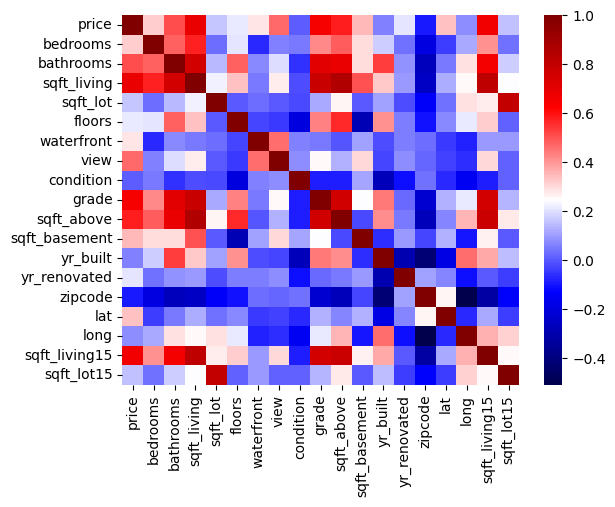

In [15]:
import seaborn as sns
sns.heatmap(data = df.corr(),cmap = "seismic")

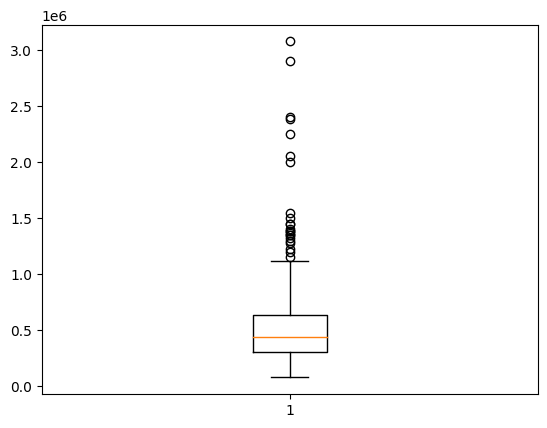

In [16]:
dfk = plt.boxplot(df['price'])

In [17]:
[i.get_ydata() for i in dfk['fliers']] # fliers are outliers

[array([1225000., 2000000., 1350000., 1325000., 1450000., 2250000.,
        1505000., 2400000., 2900000., 1365000., 2050000., 3075000.,
        2384000., 1384000., 1400000., 1350000., 1550000., 1300000.,
        1450000., 1199000., 1150000., 1385000., 1280000.])]

In [18]:
[item.get_ydata()[1] for item in dfk['whiskers']] # to whiskers


[80000.0, 1118000.0]

In [19]:
df[df['price'] > 1118000.0]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5    1225000.0         4       4.50         5420    101930     1.0   
21   2000000.0         3       2.75         3050     44867     1.0   
49   1350000.0         3       2.50         2753     65005     1.0   
69   1325000.0         5       2.25         3200     20158     1.0   
125  1450000.0         4       2.75         2750     17789     1.5   
153  2250000.0         4       3.25         5180     19850     2.0   
216  1505000.0         5       3.00         3300     33474     1.0   
246  2400000.0         4       2.50         3650      8354     1.0   
269  2900000.0         4       3.25         5050     20100     1.5   
270  1365000.0         4       4.75         5310     57346     2.0   
282  2050000.0         5       3.00         3830      8480     2.0   
300  3075000.0         4       5.00         4550     18641     1.0   
312  2384000.0         5       2.50         3650      9050     2.0   
313  1384000.0         4       3.25         4290     12103     1.0   
314  1400000.0         4       3.25         4290     12103     1.0   
384  1350000.0         5       3.50         4800     14984     2.0   
419  1550000.0         5       4.25         6070    171626     2.0   
427  1300000.0         3       2.00         2350     15021     1.0   
450  1450000.0         3       4.50         3970     24920     2.0   
472  1199000.0         4       2.75         4110      8400     2.0   
473  1150000.0         4       3.25         4190     10259     2.0   
484  1385000.0         4       3.25         4860    181319     2.5   
489  1280000.0         5       2.50         3400      9500     2.0   

     waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
5             0     0          3     11        3890           1530      2001   
21            0     4          3      9        2330            720      1968   
49            1     2          5      9        2165            588      1953   
69            0     0          3      8        1600           1600      1965   
125           0     0          3      8        1980            770      1914   
153           0     3          3     12        3540           1640      2006   
216           0     3          3      9        1870           1430      1957   
246           1     4          3      9        1830           1820      2000   
269           0     2          3     11        4750            300      1982   
270           0     0          4     11        5310              0      1989   
282           0     1          5      9        2630           1200      1905   
300           1     4          3     10        2600           1950      2002   
312           0     4          5     10        3370            280      1921   
313           0     3          3     11        2690           1600      1997   
314           0     3          3     11        2690           1600      1997   
384           0     2          3     11        3480           1320      1998   
419           0     0          3     12        6070              0      1999   
427           0     0          4      8        1770            580      1976   
450           0     2          3     10        3260            710      1977   
472           0     1          3      9        3130            980      1928   
473           0     0          3     11        3150           1040      2000   
484           0     0          3      9        4860              0      1993   
489           0     1          4      8        3400              0      1977   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
5               0    98053  47.6561 -122.005           4760      101930  
21              0    98040  47.5316 -122.233           4110       20336  
49              0    98070  47.4041 -122.451           2680       72513  
69              0    98004  47.6303 -122.215           3390       20158  
125          1992    98004  47.6141 -

In [20]:
df.drop(df[df.price> 1118000.0 ].index, inplace=True)

In [21]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

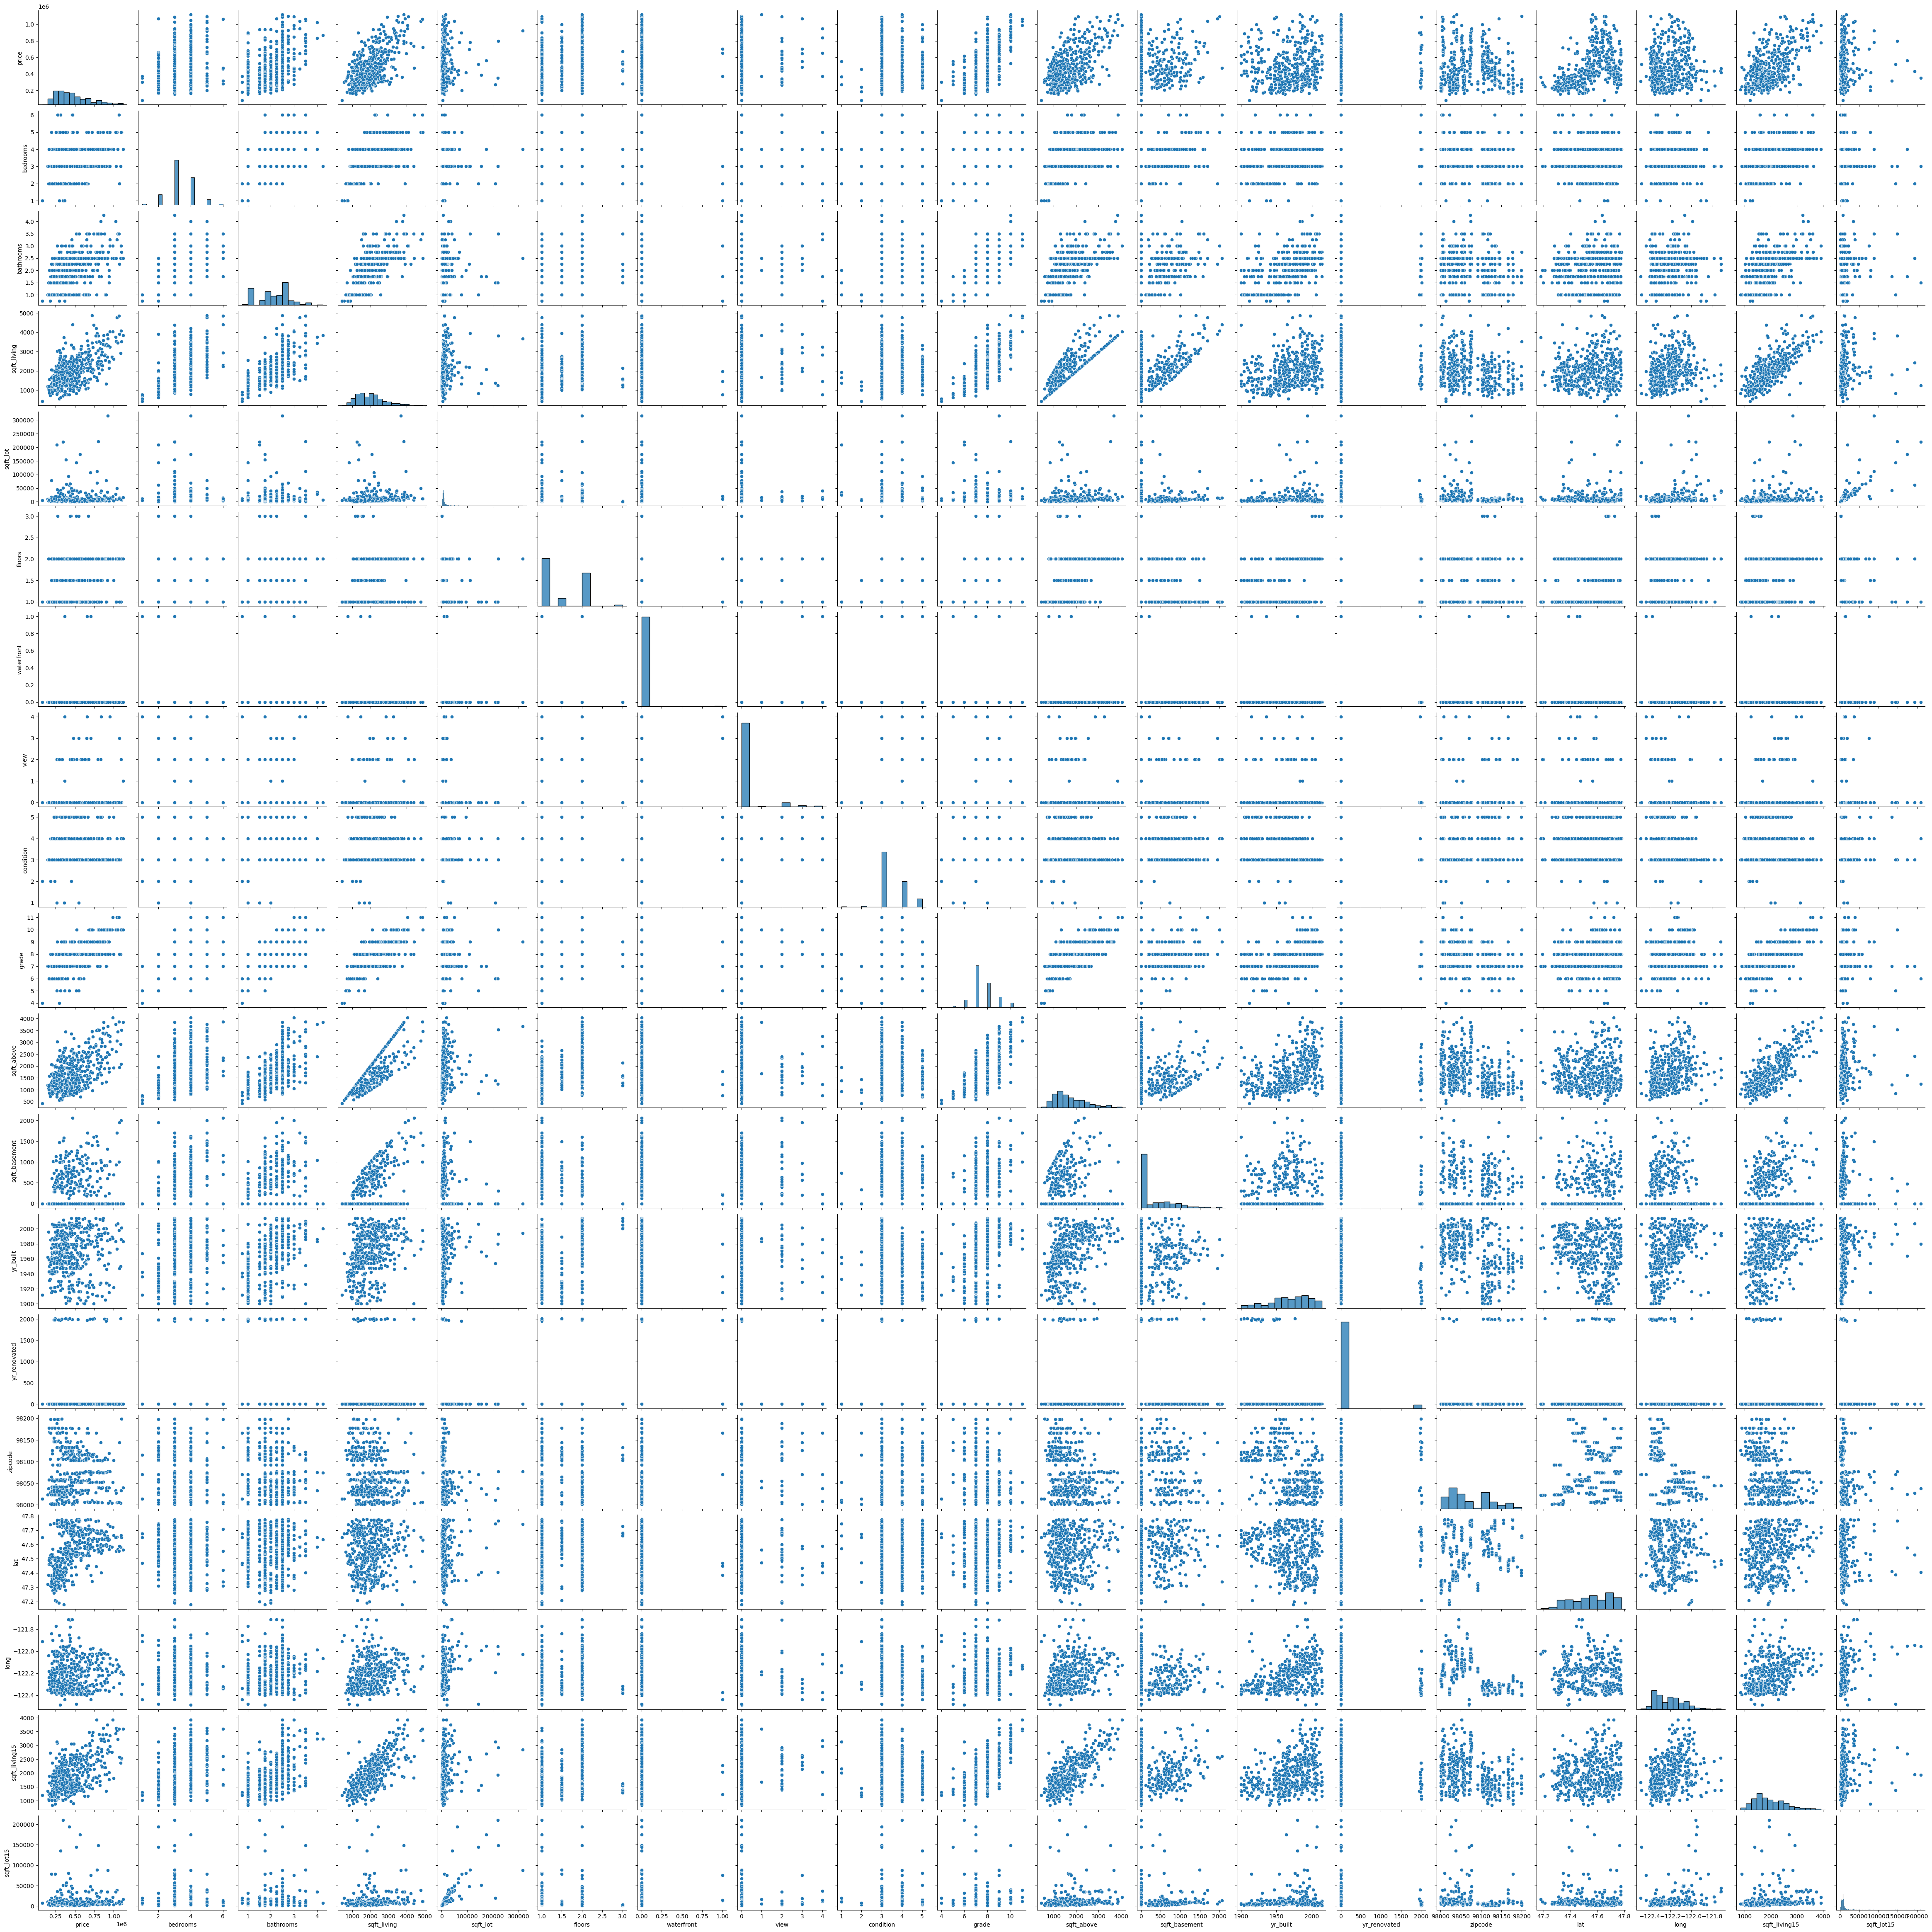

In [22]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-23-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

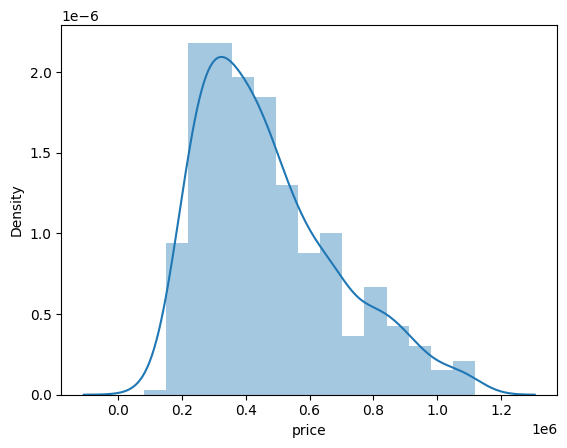

In [23]:
sns.distplot(df["price"])

<ipython-input-24-047c51978f84>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

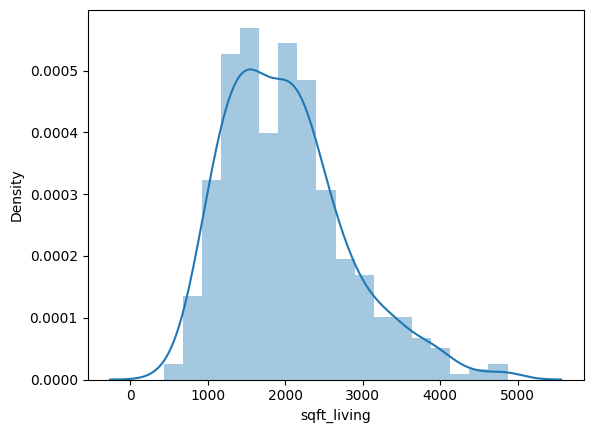

In [24]:
sns.distplot(df.sqft_living)

<ipython-input-25-a25738b3f5e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sqft_above)


<Axes: xlabel='sqft_above', ylabel='Density'>

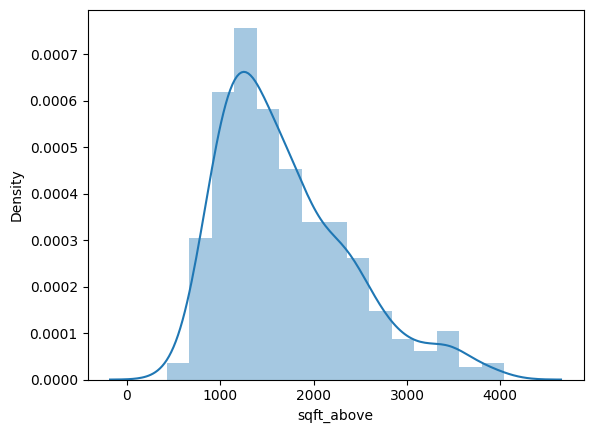

In [25]:
sns.distplot(df.sqft_above)

<ipython-input-26-e3b59a3c5937>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sqft_basement)


<Axes: xlabel='sqft_basement', ylabel='Density'>

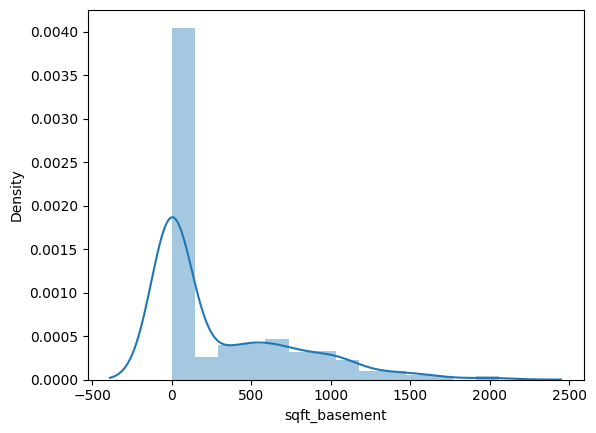

In [26]:
sns.distplot(df.sqft_basement)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


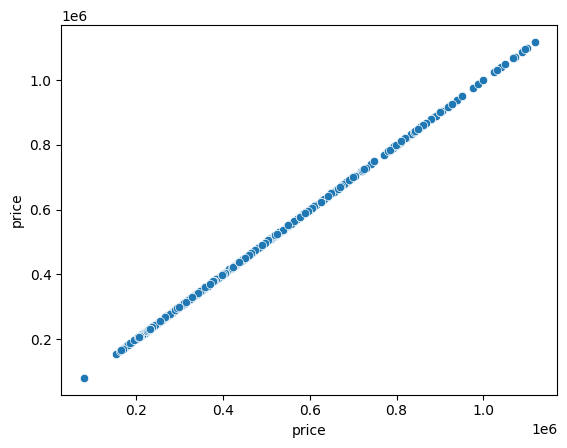

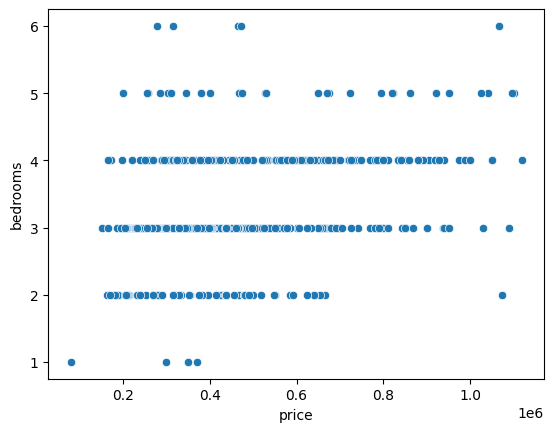

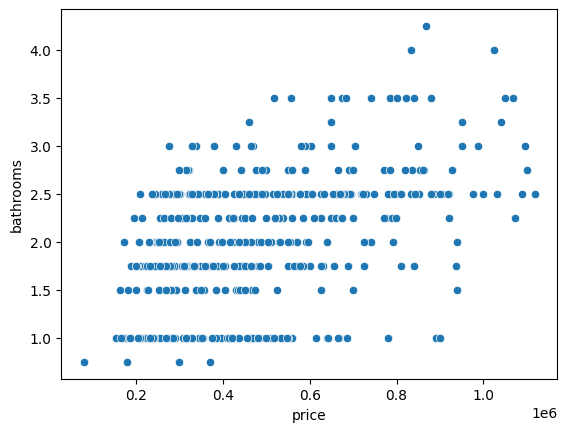

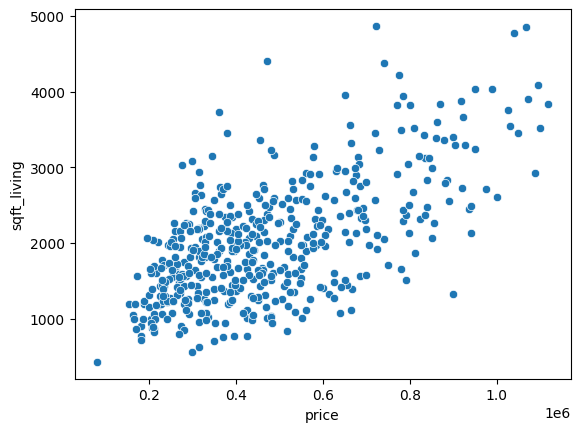

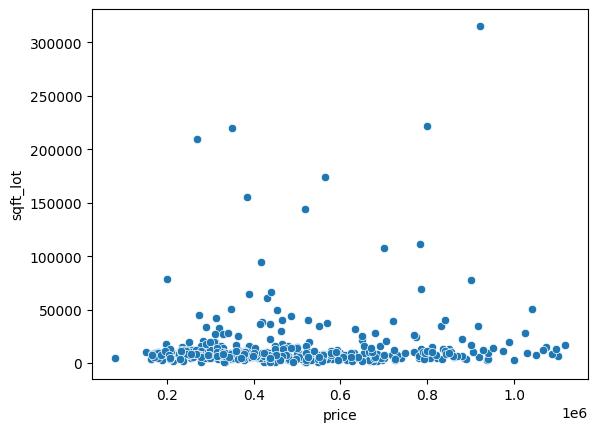

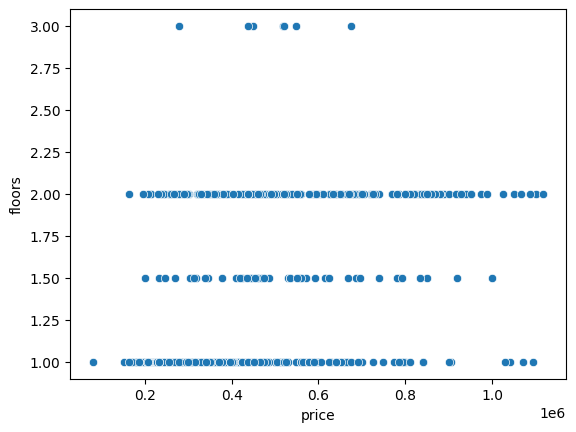

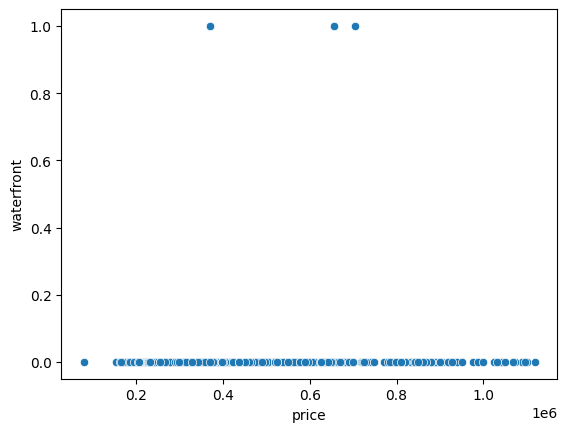

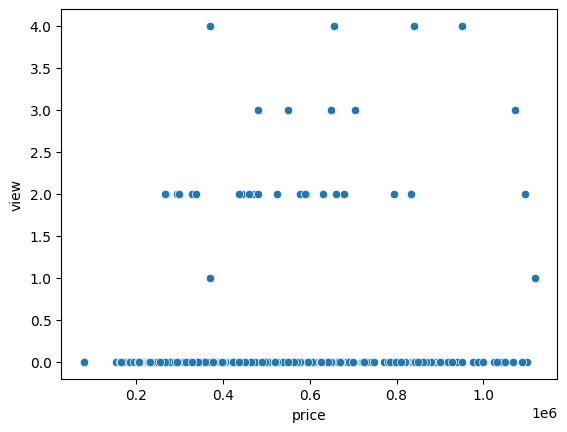

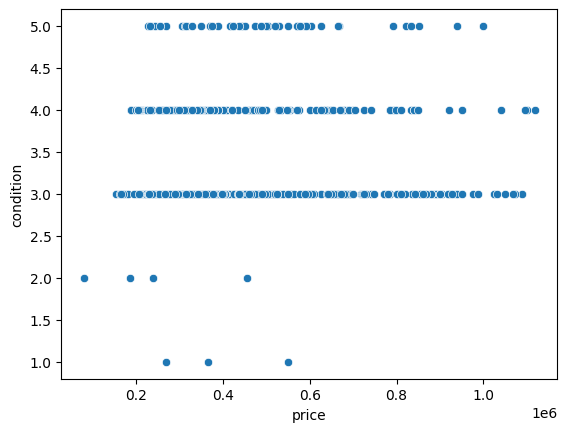

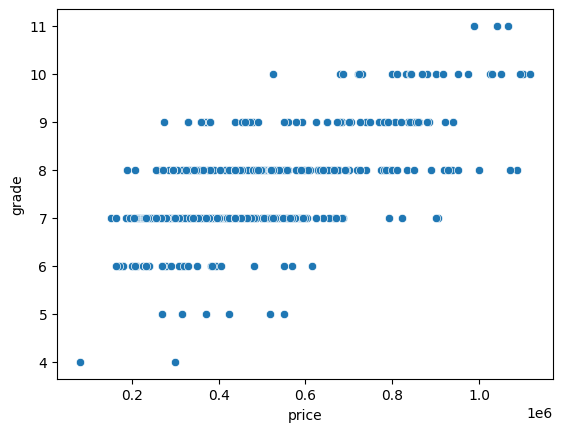

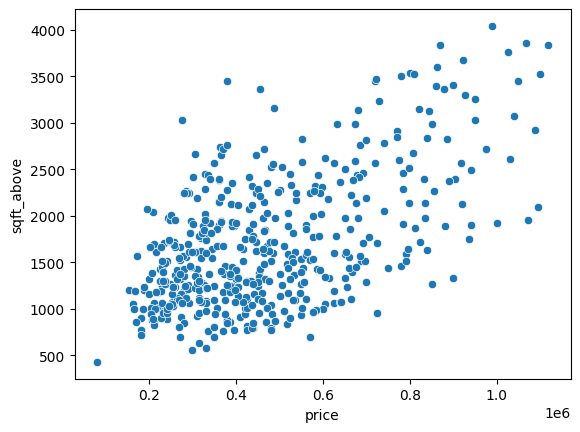

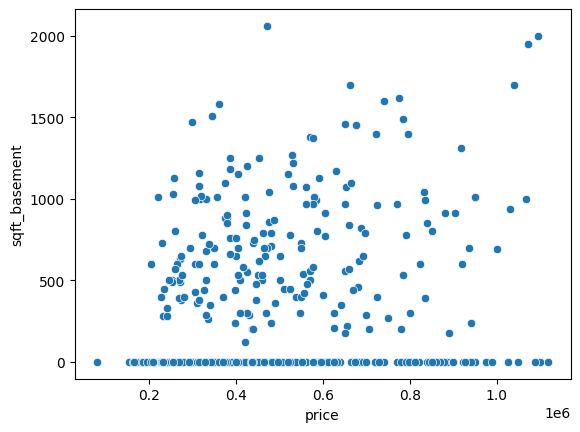

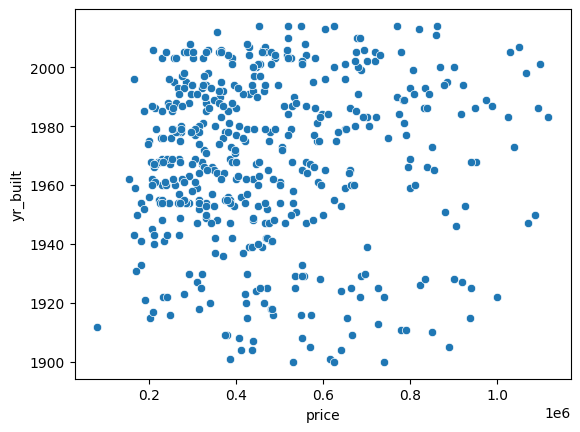

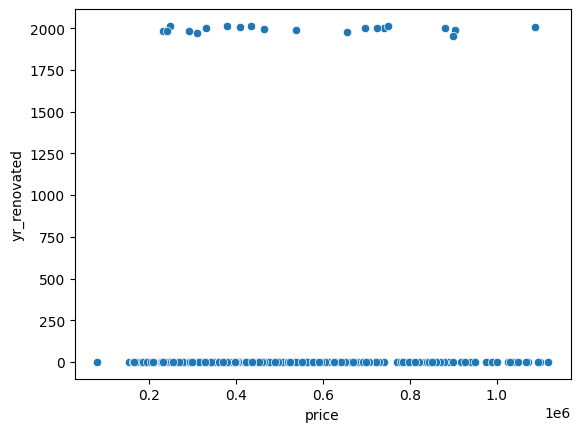

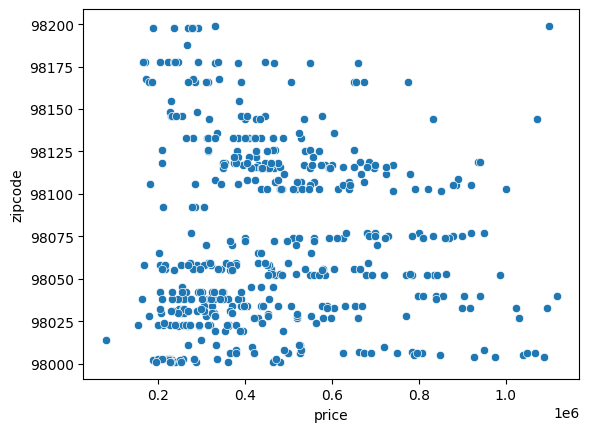

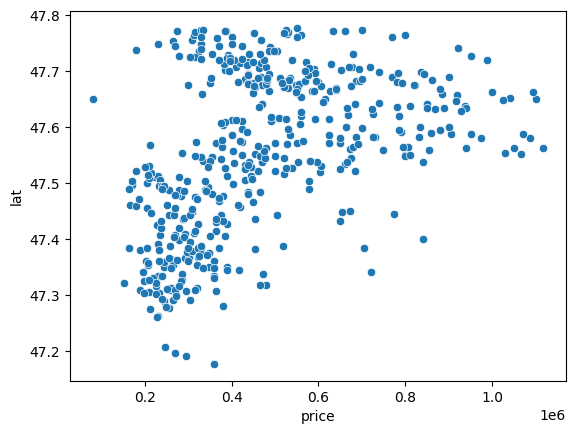

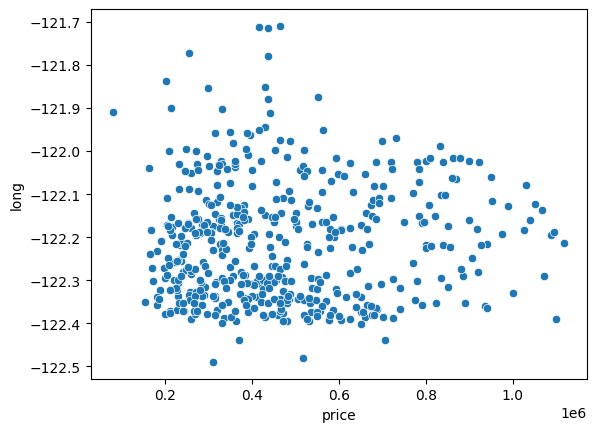

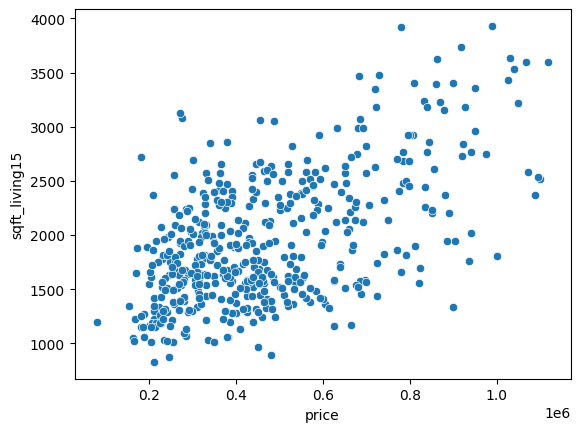

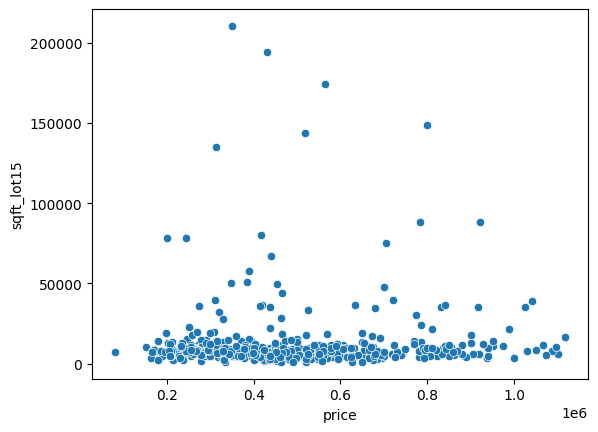

In [27]:
for i,predict in enumerate(df):
    plt.figure(i)
    sns.scatterplot(data  = df,x = "price",y = predict)
    print(predict)

<Axes: >

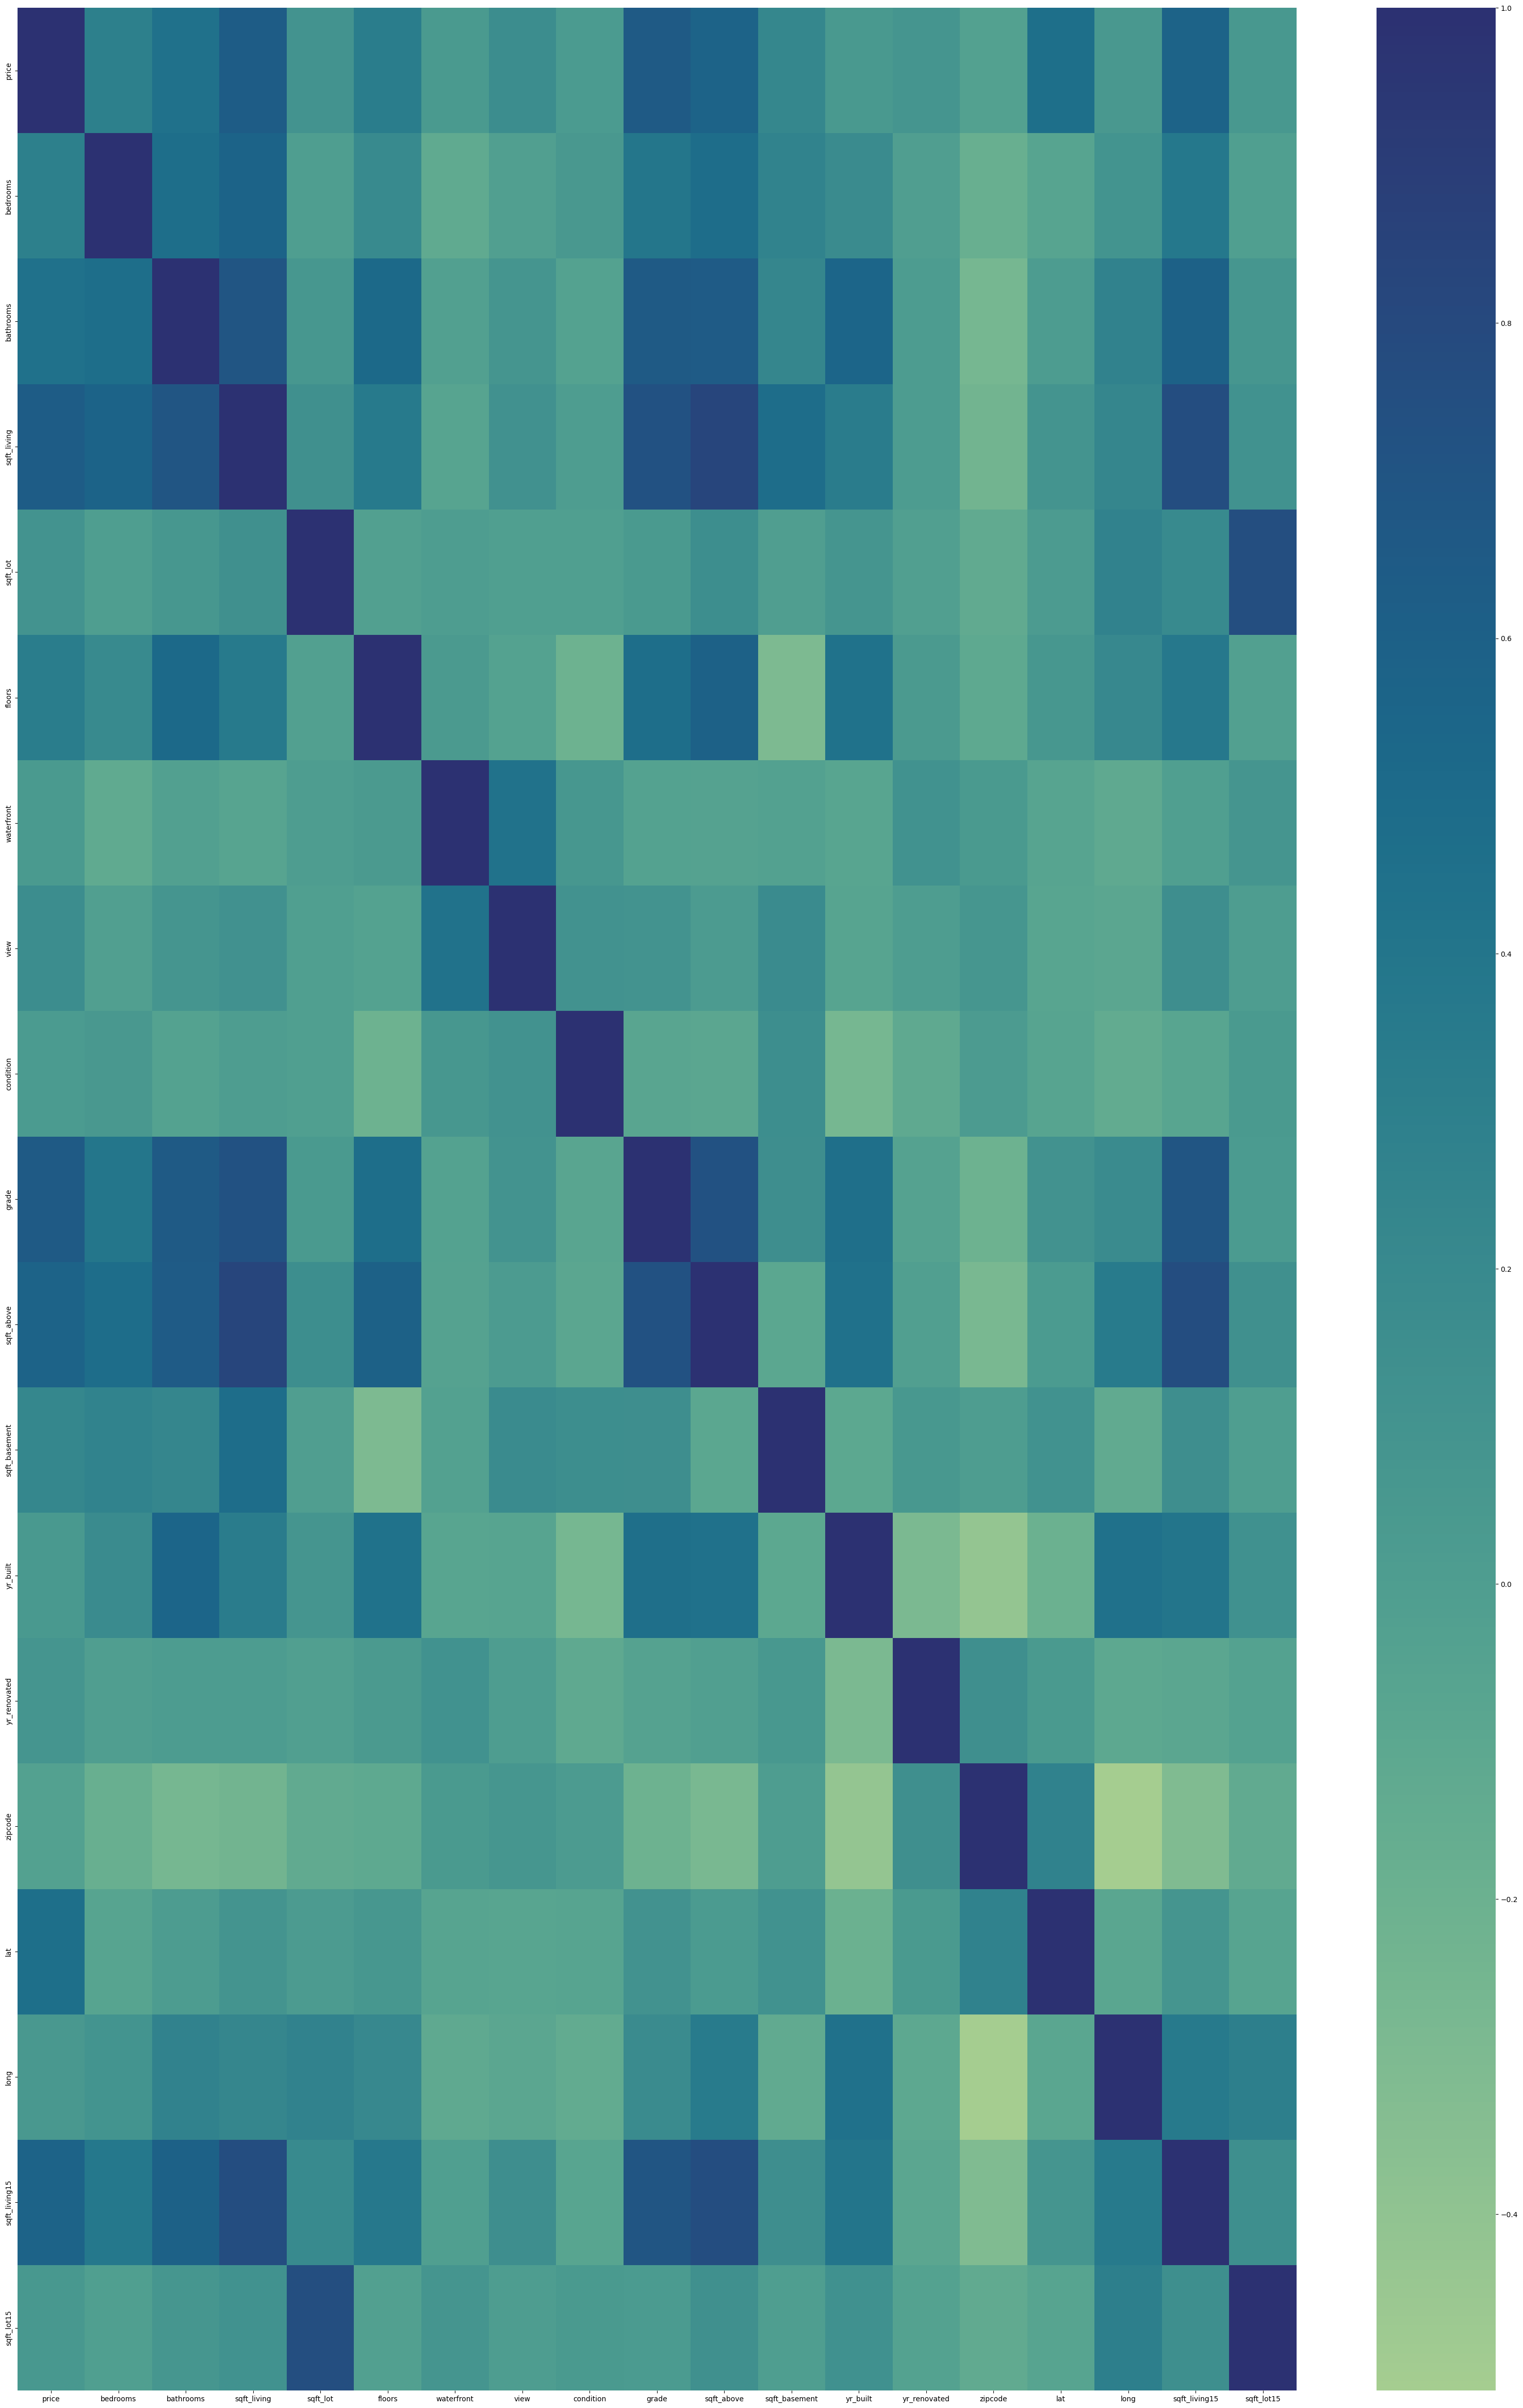

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (40,60))
sns.heatmap(df.corr(),cmap = "crest")

In [29]:
from scipy import stats
z1 = stats.zscore(df)
df1 = df[(z1<-3).all(axis = 1)]

In [30]:
df1

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[array([1040000., 1099880., 1088000., 1095000., 1072000., 1025000.,
        1118000., 1030000., 1050000., 1067000.]),
 array([1., 1., 1., 1., 6., 6., 6., 6., 6.]),
 array([4.25]),
 array([4220., 4770., 4380., 4090., 4410., 4040., 4040., 4870., 4860.]),
 array([ 34848.,  24186.,  21235.,  50094.,  50529.,  35102.,  39683.,
         41800.,  36847., 107593.,  33919.,  28037., 111078., 315374.,
         60984.,  25245.,  38332.,  21000.,  35003.,  66211., 155073.,
         28040.,  94300., 221284.,  36224.,  40510.,  26300.,  49375.,
         22111.,  78408.,  64904.,  45004.,  43995.,  20000.,  32633.,
         77972.,  29970.,  40438.,  69415., 209959.,  26977.,  25600.,
         22357.,  40139., 143947.,  32239.,  37461., 174240.,  27260.,
        219978.,  20978.,  28025.]),
 array([], dtype=float64),
 array([1., 1., 1.]),
 array([3., 4., 3., 2., 2., 3., 2., 2., 2., 2., 3., 4., 2., 2., 2., 4., 2.,
        3., 2., 2., 2., 2., 2., 2., 1., 4., 2., 2., 3., 2., 2., 2., 2., 1.,
        2.])

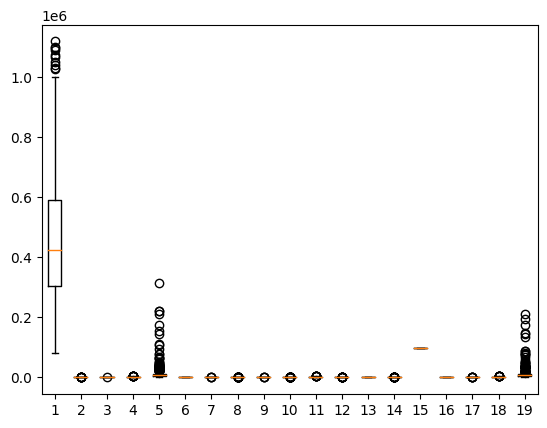

In [31]:
dfr = plt.boxplot(df)
[item.get_ydata() for item in dfr["fliers"]]

In [32]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

<Axes: xlabel='bedrooms', ylabel='price'>

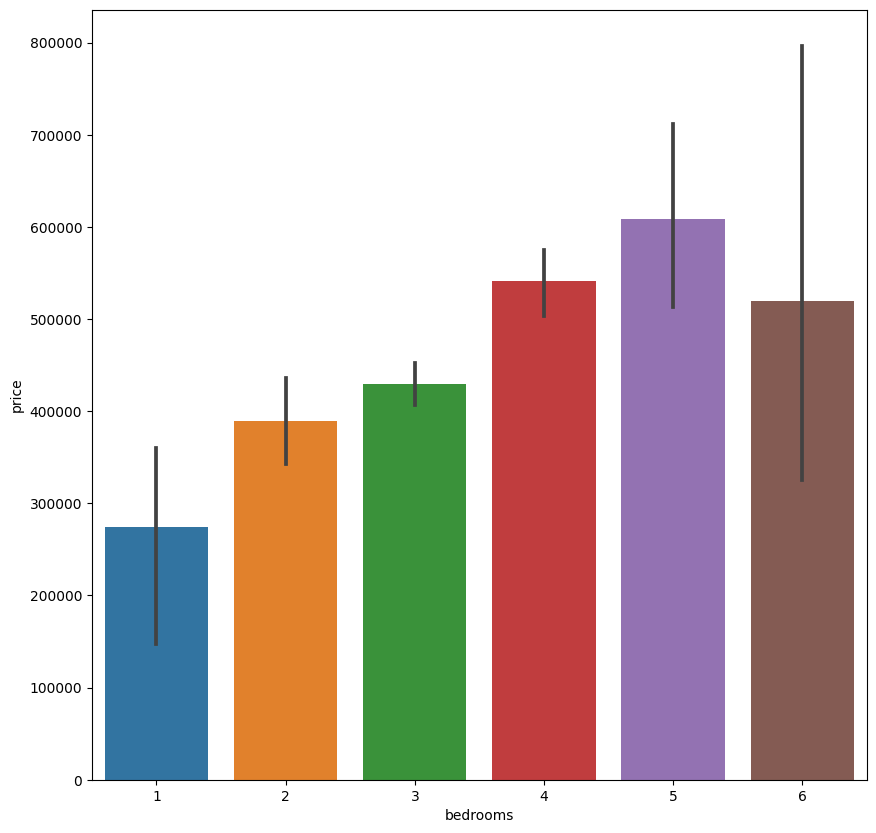

In [33]:
plt.figure(figsize = (10,10))
sns.barplot(data = df, x = df.bedrooms, y = df.price)


<Axes: xlabel='floors', ylabel='price'>

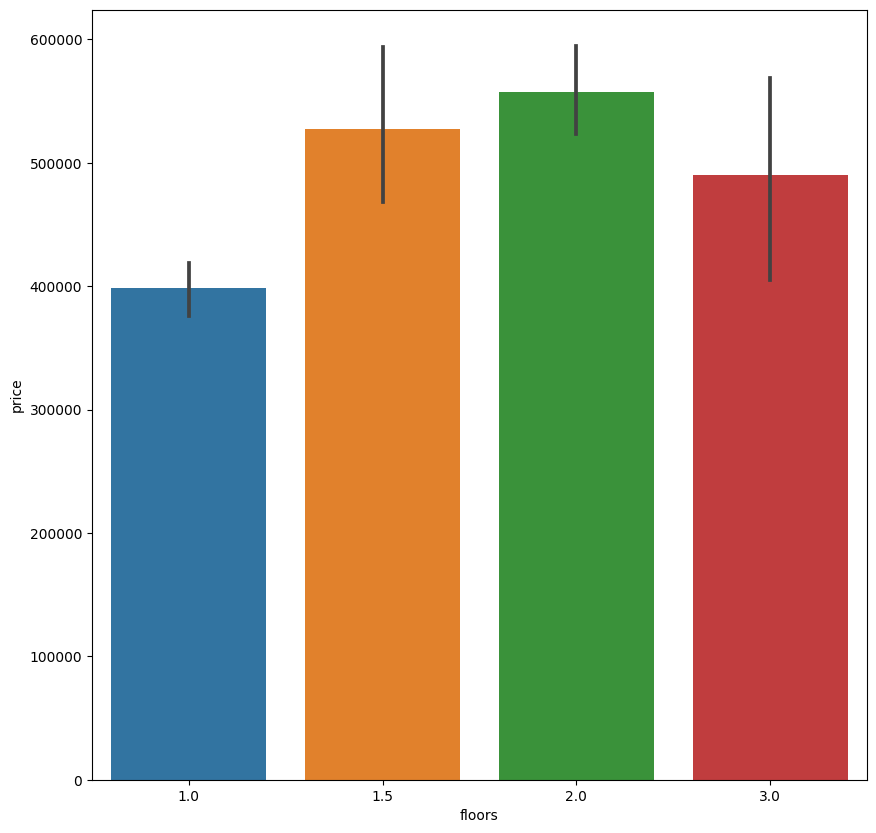

In [34]:
plt.figure(figsize = (10,10))
sns.barplot(data = df, x = df.floors, y = df.price)


<Axes: xlabel='view', ylabel='price'>

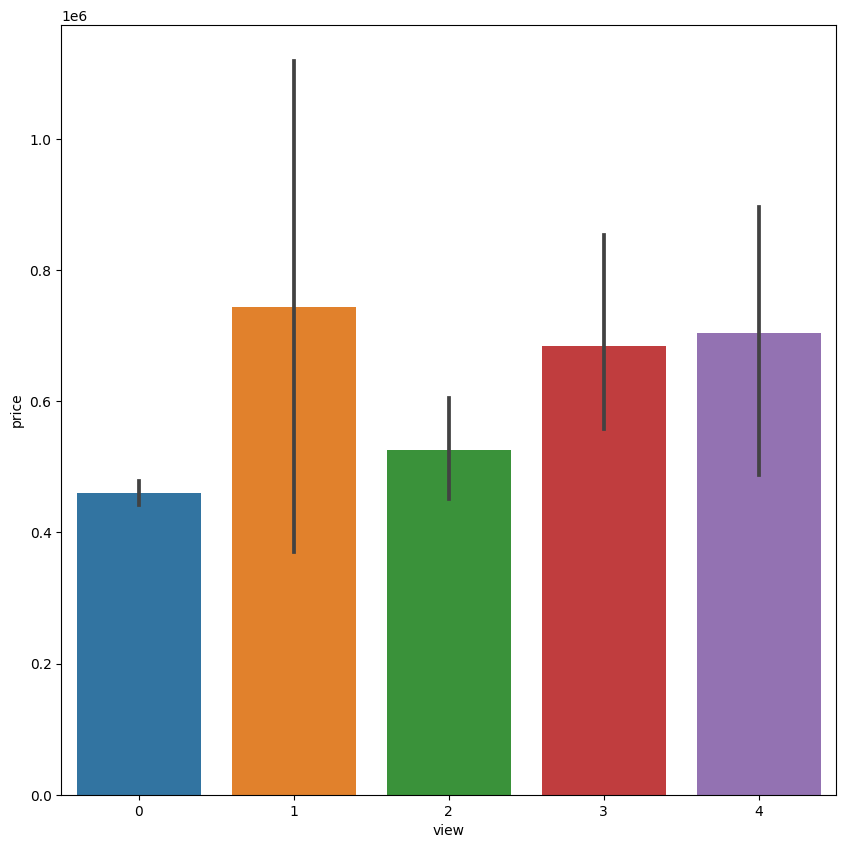

In [35]:
plt.figure(figsize = (10,10))
sns.barplot(data = df, x = df.view, y = df.price)


<Axes: xlabel='price', ylabel='Count'>

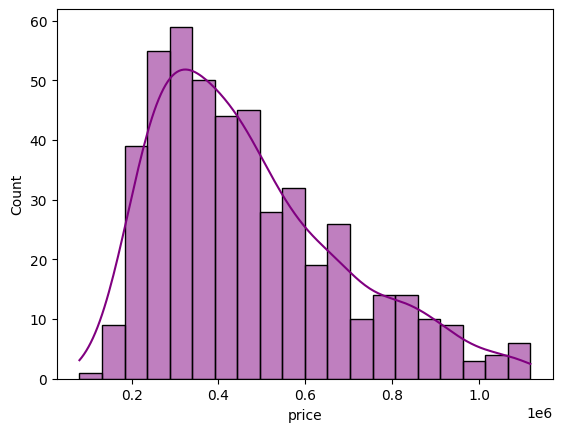

In [36]:
sns.histplot(df["price"],bins=20, kde = True, color = "purple")

In [37]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
df['waterfront'].unique()

array([0, 1])

In [39]:
df["view"].unique()

array([0, 3, 4, 2, 1])

In [40]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df5 = SS.fit_transform(df)

In [41]:
df5 = pd.DataFrame(df5, columns = [['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']])

In [42]:
df5

price  bedrooms bathrooms sqft_living  sqft_lot    floors waterfront  \
0   -1.155668 -0.396121 -1.511501   -1.044534 -0.308499 -0.873942  -0.079556   
1    0.318870 -0.396121  0.328688    0.717053 -0.250381  1.111155  -0.079556   
2   -1.351122 -1.599623 -1.511501   -1.564139 -0.149698 -0.873942  -0.079556   
3    0.626745  0.807381  1.432801   -0.056018 -0.332228 -0.873942  -0.079556   
4    0.188256 -0.396121 -0.039350   -0.410870 -0.219789 -0.873942  -0.079556   
..        ...       ...       ...         ...       ...       ...        ...   
472  0.094960 -1.599623  0.696726   -0.981168 -0.463978  1.111155  -0.079556   
473  1.191184  0.807381 -0.039350    0.134082 -0.363623  1.111155  -0.079556   
474 -0.796013 -0.396121  1.064763    1.363391  0.202038 -0.873942  -0.079556   
475  0.724706 -1.599623 -0.775426   -0.651662 -0.304848  0.118606  -0.079556   
476 -0.149941 -0.396121  0.696726    0.146755 -0.350481  1.111155  -0.079556   

         view condition     grade sqft_above sqft_basement  yr_built  \
0   -0.266887 -0.640446 -0.517147  -0.745588     -0.687082 -0.472404   
1   -0.266887 -0.640446 -0.517147   0.673731      0.216556 -0.615113   
2   -0.266887 -0.640446 -1.458669  -1.333387     -0.687082 -1.257301   
3   -0.266887  2.228030 -0.517147  -0.931963      1.368694 -0.115633   
4   -0.266887 -0.640446  0.424376  -0.028760     -0.687082  0.669264   
..        ...       ...       ...        ...           ...       ...   
472 -0.266887 -0.640446  0.424376  -1.190021      0.126192  1.275775   
473 -0.266887 -0.640446  1.365899   0.014249      0.216556 -1.542718   
474  2.838118  0.793792 -0.517147  -0.129116      2.633787 -0.365373   
475 -0.266887  0.793792 -0.517147  -0.731252     -0.009354 -2.434646   
476 -0.266887 -0.640446 -0.517147   0.602048     -0.687082  1.133067   

    yr_renovated   zipcode       lat      long sqft_living15 sqft_lot15  
0      -0.209191  1.985574 -0.255982 -0.307420     -1.014774  -0.328965  
1       4.768894  0.971344  1.203903 -0.757122     -0.427635  -0.234993  
2      -0.209191 -0.884889  1.321501 -0.133341      1.300230  -0.215009  
3      -0.209191  1.181845 -0.189181 -1.293863     -0.981223  -0.359674  
4      -0.209191 -0.004614  0.478831  1.230271     -0.243106  -0.241419  
..           ...       ...       ...       ...           ...        ...  
472    -0.209191  0.722570  0.495531 -0.626563     -1.182528  -0.532120  
473     4.798898  0.799116  0.247810 -1.250343     -0.847020  -0.387076  
474    -0.209191 -0.808343 -1.140403 -0.503258      0.803678  -0.009586  
475    -0.209191  0.799116  0.272861 -1.272103     -0.595389  -0.405738  
476    -0.209191 -0.176841 -0.109855  2.427059      0.981497  -0.368367  

[477 rows x 19 columns]

In [43]:
from sklearn.model_selection import train_test_split



In [44]:
X = df5.iloc[:,1:]

In [45]:
X

bedrooms bathrooms sqft_living  sqft_lot    floors waterfront      view  \
0   -0.396121 -1.511501   -1.044534 -0.308499 -0.873942  -0.079556 -0.266887   
1   -0.396121  0.328688    0.717053 -0.250381  1.111155  -0.079556 -0.266887   
2   -1.599623 -1.511501   -1.564139 -0.149698 -0.873942  -0.079556 -0.266887   
3    0.807381  1.432801   -0.056018 -0.332228 -0.873942  -0.079556 -0.266887   
4   -0.396121 -0.039350   -0.410870 -0.219789 -0.873942  -0.079556 -0.266887   
..        ...       ...         ...       ...       ...        ...       ...   
472 -1.599623  0.696726   -0.981168 -0.463978  1.111155  -0.079556 -0.266887   
473  0.807381 -0.039350    0.134082 -0.363623  1.111155  -0.079556 -0.266887   
474 -0.396121  1.064763    1.363391  0.202038 -0.873942  -0.079556  2.838118   
475 -1.599623 -0.775426   -0.651662 -0.304848  0.118606  -0.079556 -0.266887   
476 -0.396121  0.696726    0.146755 -0.350481  1.111155  -0.079556 -0.266887   

    condition     grade sqft_above sqft_basement  yr_built yr_renovated  \
0   -0.640446 -0.517147  -0.745588     -0.687082 -0.472404    -0.209191   
1   -0.640446 -0.517147   0.673731      0.216556 -0.615113     4.768894   
2   -0.640446 -1.458669  -1.333387     -0.687082 -1.257301    -0.209191   
3    2.228030 -0.517147  -0.931963      1.368694 -0.115633    -0.209191   
4   -0.640446  0.424376  -0.028760     -0.687082  0.669264    -0.209191   
..        ...       ...        ...           ...       ...          ...   
472 -0.640446  0.424376  -1.190021      0.126192  1.275775    -0.209191   
473 -0.640446  1.365899   0.014249      0.216556 -1.542718     4.798898   
474  0.793792 -0.517147  -0.129116      2.633787 -0.365373    -0.209191   
475  0.793792 -0.517147  -0.731252     -0.009354 -2.434646    -0.209191   
476 -0.640446 -0.517147   0.602048     -0.687082  1.133067    -0.209191   

      zipcode       lat      long sqft_living15 sqft_lot15  
0    1.985574 -0.255982 -0.307420     -1.014774  -0.328965  
1    0.971344  1.203903 -0.757122     -0.427635  -0.234993  
2   -0.884889  1.321501 -0.133341      1.300230  -0.215009  
3    1.181845 -0.189181 -1.293863     -0.981223  -0.359674  
4   -0.004614  0.478831  1.230271     -0.243106  -0.241419  
..        ...       ...       ...           ...        ...  
472  0.722570  0.495531 -0.626563     -1.182528  -0.532120  
473  0.799116  0.247810 -1.250343     -0.847020  -0.387076  
474 -0.808343 -1.140403 -0.503258      0.803678  -0.009586  
475  0.799116  0.272861 -1.272103     -0.595389  -0.405738  
476 -0.176841 -0.109855  2.427059      0.981497  -0.368367  

[477 rows x 18 columns]

In [46]:
Y = df.iloc[: , 0:1]

In [47]:
Y

price
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
..        ...
495  490000.0
496  725000.0
497  299000.0
498  625000.0
499  437500.0

[477 rows x 1 columns]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 42)

In [50]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(333, 18) (144, 18) (333, 1) (144, 1)


In [51]:
import numpy as np

In [52]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
LR.score(X_train,Y_train).round(2)

0.71

In [53]:
y_pred = LR.predict(X_test)

In [54]:
y_pred

array([[ 346897.76184462],
       [ 686264.17865731],
       [ 276868.94951571],
       [ 418005.53632997],
       [ 381427.78147294],
       [ 198021.84354444],
       [ 556454.00344614],
       [ 206965.35044904],
       [ 455193.36414241],
       [ 619371.93234414],
       [ 702618.27405344],
       [ 444894.57038297],
       [ 492202.92933405],
       [ 371919.11712451],
       [ 369695.52674023],
       [ 692067.77485252],
       [ 558560.03193143],
       [ 435967.37671587],
       [ 423502.15338175],
       [ 352701.93463067],
       [ 316920.16853504],
       [ 319961.19788234],
       [ 228677.23106485],
       [ 645225.04650328],
       [ 287601.295667  ],
       [ 649834.70688009],
       [ 586949.26728533],
       [ 220198.18462711],
       [ 467117.22782487],
       [ 381426.51443367],
       [ 465743.38033252],
       [ 441099.69008167],
       [ 484288.10566125],
       [ 205996.26813489],
       [ 789746.22049873],
       [ 502841.58993552],
       [ 256991.04214627],
 

In [55]:
Y_test

price
491  370000.0
35   696000.0
136  220000.0
76   380000.0
82   355000.0
..        ...
3    604000.0
396  530000.0
63   549000.0
114  480000.0
319  268750.0

[144 rows x 1 columns]

In [56]:
y_pred = LR.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
mse = mean_squared_error(Y_test,y_pred)
metrics.r2_score(Y_test,y_pred)

0.6490138514163544

In [58]:
mse

12592193148.338863

In [59]:
from sklearn.linear_model import Lasso,Ridge

In [60]:
model = Ridge(alpha = 10)
model.fit(X_train,Y_train)
y_pred1 = model.predict(X_test)

In [61]:
print(metrics.r2_score(Y_test,y_pred1))
print(mean_squared_error(Y_test,y_pred1))


0.6515927904535128
12499669558.43443


In [62]:
model1 = Lasso(alpha=0.001)
model1.fit(X_train,Y_train)
y_pred2 = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.604e+11, tolerance: 1.671e+09
  model = cd_fast.enet_coordinate_descent(


In [63]:
print(metrics.r2_score(Y_test,y_pred2))
print(mean_squared_error(Y_test,y_pred2))


0.6515927904535128
12499669558.43443


In [64]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth = 6)


In [65]:
DTR.fit(X_train,Y_train)
y_pred3 = DTR.predict(X_test)

In [66]:
print(metrics.r2_score(Y_test,y_pred3))
print(mean_squared_error(Y_test,y_pred3))


0.6988953366566244
10802614558.966688


In [67]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=200, max_samples = 0.7, max_features = 0.80,max_depth=6)

In [68]:
RF.fit(X_train,Y_train)
y_pred4 = RF.predict(X_test)

<ipython-input-68-255b24a5892d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


In [69]:
print(metrics.r2_score(Y_test,y_pred4))
print(mean_squared_error(Y_test,y_pred4))


0.8010475054987194
7137741042.5269575


[Text(0.594231907745649, 0.9722222222222222, "('bathrooms',) <= 0.54\nsquared_error = 50190713697.411\nsamples = 333\nvalue = 475742.333"),
 Text(0.3739356247733865, 0.9166666666666666, "('zipcode',) <= -0.129\nsquared_error = 25361099142.24\nsamples = 243\nvalue = 393880.461"),
 Text(0.21880240436910806, 0.8611111111111112, "('sqft_living',) <= 0.044\nsquared_error = 9678786175.718\nsamples = 116\nvalue = 295687.621"),
 Text(0.1414663025743292, 0.8055555555555556, "('bathrooms',) <= -0.265\nsquared_error = 4345290415.668\nsamples = 90\nvalue = 266635.9"),
 Text(0.05112966823785352, 0.75, "('lat',) <= -1.142\nsquared_error = 1932946931.779\nsamples = 59\nvalue = 239400.814"),
 Text(0.02102973168963017, 0.6944444444444444, "('long',) <= -1.157\nsquared_error = 101002500.0\nsamples = 2\nvalue = 379950.0"),
 Text(0.018129079042784626, 0.6388888888888888, 'squared_error = 0.0\nsamples = 1\nvalue = 369900.0'),
 Text(0.023930384336475707, 0.6388888888888888, 'squared_error = 0.0\nsamples = 1

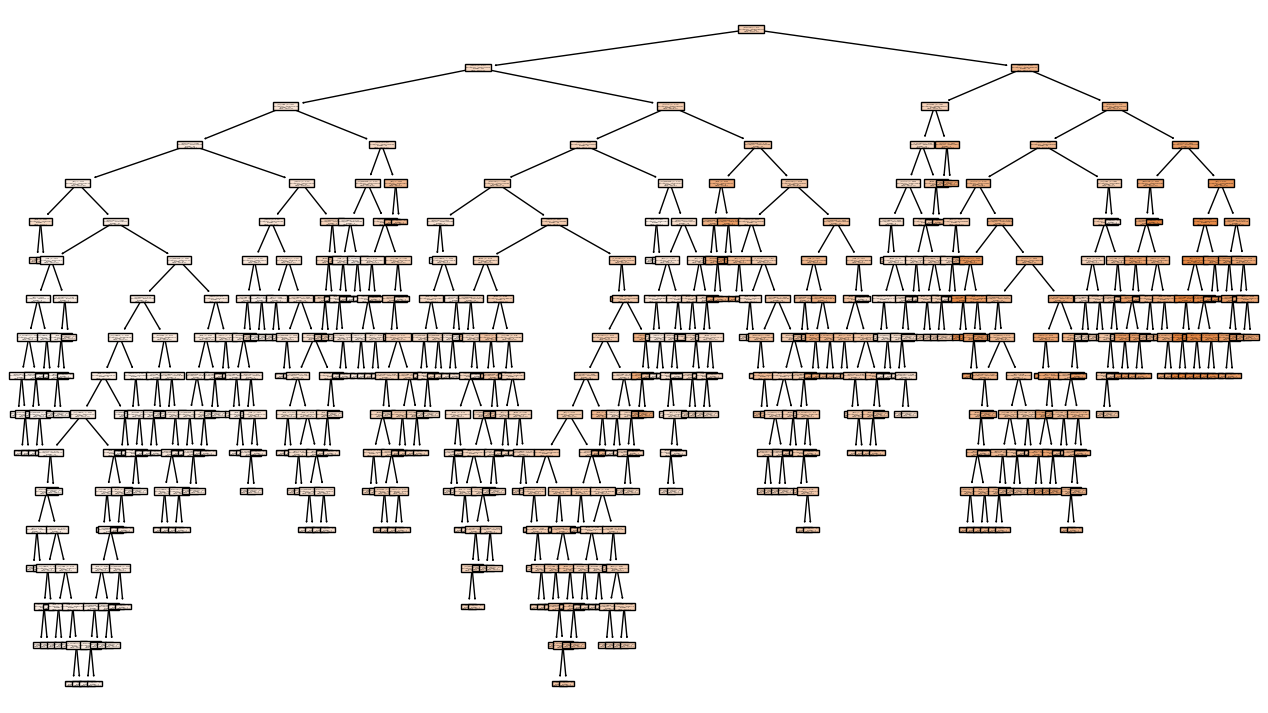

In [70]:
from sklearn import tree
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,Y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=df5.columns)

In [71]:
path = reg.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas = path.ccp_alphas

In [72]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,Y_train)
    alphalist.append(reg)

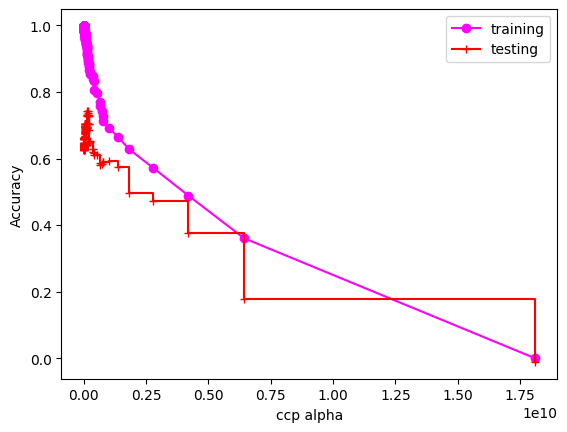

In [73]:
train_score = [reg.score(X_train,Y_train) for reg in alphalist]
test_score = [reg.score(X_test,Y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.594231907745649, 0.9722222222222222, 'bathrooms <= 0.54\nsquared_error = 50190713697.411\nsamples = 333\nvalue = 475742.333'),
 Text(0.3739356247733865, 0.9166666666666666, 'zipcode <= -0.129\nsquared_error = 25361099142.24\nsamples = 243\nvalue = 393880.461'),
 Text(0.21880240436910806, 0.8611111111111112, 'sqft_living <= 0.044\nsquared_error = 9678786175.718\nsamples = 116\nvalue = 295687.621'),
 Text(0.1414663025743292, 0.8055555555555556, 'bathrooms <= -0.265\nsquared_error = 4345290415.668\nsamples = 90\nvalue = 266635.9'),
 Text(0.05112966823785352, 0.75, 'lat <= -1.142\nsquared_error = 1932946931.779\nsamples = 59\nvalue = 239400.814'),
 Text(0.02102973168963017, 0.6944444444444444, 'long <= -1.157\nsquared_error = 101002500.0\nsamples = 2\nvalue = 379950.0'),
 Text(0.018129079042784626, 0.6388888888888888, 'squared_error = 0.0\nsamples = 1\nvalue = 369900.0'),
 Text(0.023930384336475707, 0.6388888888888888, 'squared_error = 0.0\nsamples = 1\nvalue = 390000.0'),
 Text(0.

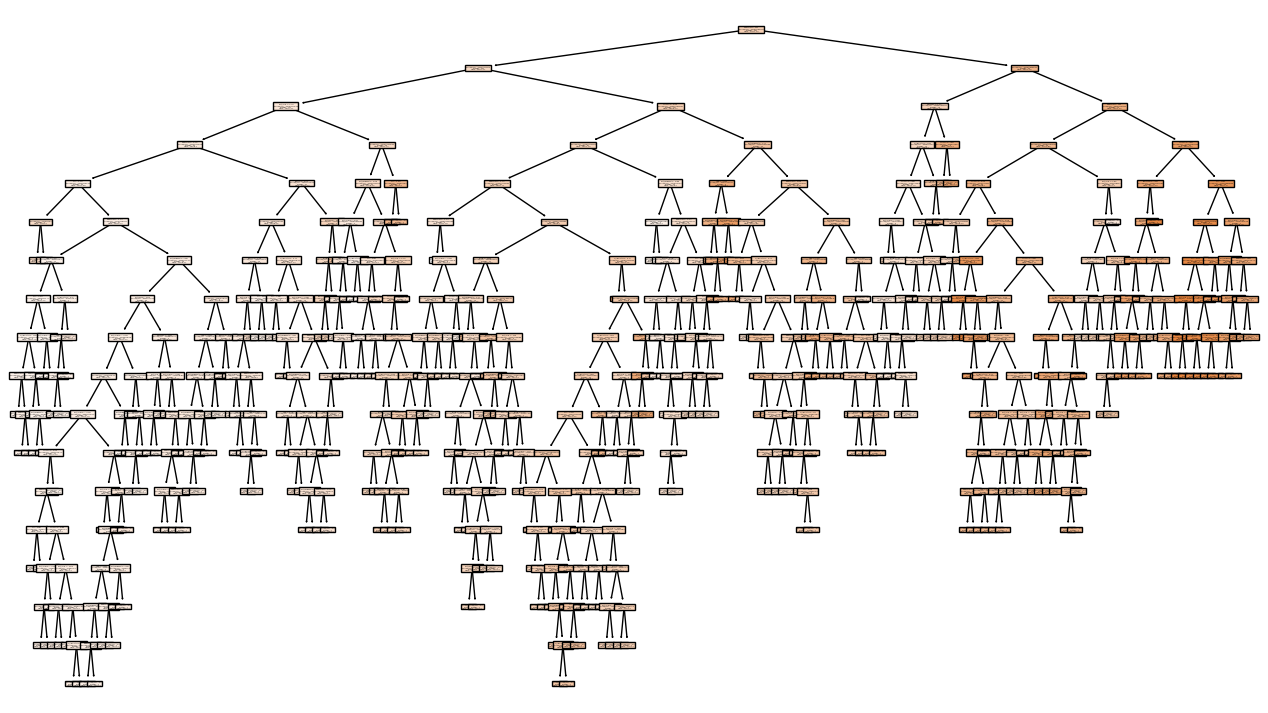

In [74]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,Y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=df.columns)

In [75]:
params=  {

    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["absolute_error","squared_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["absolute_error","squared_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [76]:
from sklearn.model_selection import RandomizedSearchCV
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,Y_train)
    scores.append({
        'model_name':model,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=833; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=833; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=833; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=833; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=833; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=955; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=955; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=955; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=955; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=955; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=711; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=711; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=711; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=711; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=711; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=10, min_sam

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_sp

In [77]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

model_name    best_score  \
0  Ridge(alpha=10) -1.349839e+10   
1  Ridge(alpha=10) -1.946282e+10   

                                      best_estimator  
0  (DecisionTreeRegressor(ccp_alpha=0.005, max_de...  
1  DecisionTreeRegressor(ccp_alpha=0.0075, criter...

In [78]:
scores_df.best_estimator

0    (DecisionTreeRegressor(ccp_alpha=0.005, max_de...
1    DecisionTreeRegressor(ccp_alpha=0.0075, criter...
Name: best_estimator, dtype: object

In [79]:
clf.score(X_train,Y_train)

-10307158578.411411

In [80]:
Y_train

price
448  475000.0
31   280000.0
301  335000.0
154  350000.0
28   438000.0
..        ...
110  597750.0
280  304900.0
363  604950.0
454  811000.0
106  460000.0

[333 rows x 1 columns]

In [81]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,Y_train)
ypred8 = rf.predict(X_test)
print(metrics.r2_score(Y_test,ypred8))

<ipython-input-81-40beda8da1f9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


0.7372545611930308


In [82]:
df["predicted price"] = pd.DataFrame(ypred8)

In [83]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    221900.0         3       1.00         1180      5650     1.0           0   
1    538000.0         3       2.25         2570      7242     2.0           0   
2    180000.0         2       1.00          770     10000     1.0           0   
3    604000.0         4       3.00         1960      5000     1.0           0   
4    510000.0         3       2.00         1680      8080     1.0           0   
..        ...       ...        ...          ...       ...     ...         ...   
495  490000.0         2       2.50         1230      1391     2.0           0   
496  725000.0         4       2.00         2110      4140     2.0           0   
497  299000.0         3       2.75         3080     19635     1.0           0   
498  625000.0         2       1.50         1490      5750     1.5           0   
499  437500.0         3       2.50         2120      4500     2.0           0   

     view  condition  grade  sqft_above  sqft_basement  yr_built  \
0       0          3      7        1180              0      1955   
1       0          3      7        2170            400      1951   
2       0          3      6         770              0      1933   
3       0          5      7        1050            910      1965   
4       0          3      8        1680              0      1987   
..    ...        ...    ...         ...            ...       ...   
495     0          3      8         870            360      2004   
496     0          3      9        1710            400      1925   
497     2          4      7        1610           1470      1958   
498     0          4      7        1190            300      1900   
499     0          3      7        2120              0      2000   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0    98178  47.5112 -122.257           1340        5650   
1            1991    98125  47.7210 -122.319           1690        7639   
2               0    98028  47.7379 -122.233           2720        8062   
3               0    98136  47.5208 -122.393           1360        5000   
4               0    98074  47.6168 -122.045           1800        7503   
..            ...      ...      ...      ...            ...         ...   
495             0    98112  47.6192 -122.301           1240        1350   
496          2003    98116  47.5836 -122.387           1440        4420   
497             0    98032  47.3841 -122.284           2424       12410   
498             0    98116  47.5872 -122.390           1590        4025   
499             0    98065  47.5322 -121.880           2530        4816   

     predicted price  
0      267751.991029  
1      608297.845715  
2      284392.189173  
3      436684.729554  
4      437211.580739  
..               ...  
495              NaN  
496              NaN  
497              NaN  
498              NaN  
499              NaN  

[477 rows x 20 columns]

<ipython-input-84-b76c176026fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],hist=False,color='orange',label='Actual')
<ipython-input-84-b76c176026fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['predicted price'],hist=False,color='blue',label='Predicted

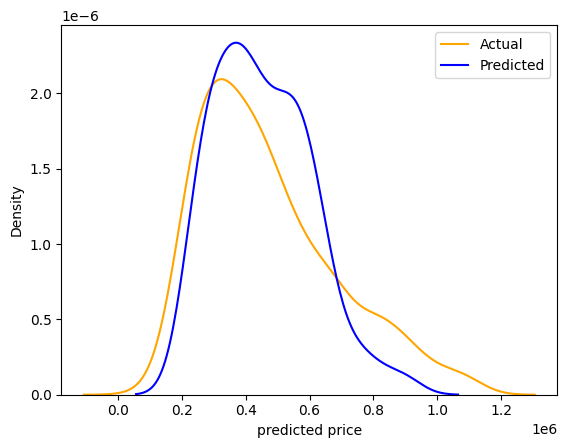

In [84]:

sns.distplot(df['price'],hist=False,color='orange',label='Actual')
sns.distplot(df['predicted price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [86]:

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [87]:
model = KNeighborsRegressor()
g = GridSearchCV(model,param_grid)
g.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [88]:
print(g.best_score_)
print(g.best_params_)

0.6294972338758448
{'n_neighbors': 3}


In [89]:
import pickle
file = open('HousePricePredictor.pkl','wb')
pickle.dump(rf,file)
file.close()


In [92]:
model = RandomForestRegressor()
from sklearn.model_selection import KFold,cross_val_score
K = KFold(n_splits = 10)
results = cross_val_score(rf, X_train,Y_train,cv=K )

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [93]:
print(results)

[0.72346703 0.76675861 0.71505447 0.67495136 0.66187535 0.68654005
 0.77650378 0.62935185 0.64440667 0.64855895]


In [94]:
r = np.mean(results)

In [95]:
r

0.6927468117144502

In [ ]:
2